In [1]:
%matplotlib inline  
%pylab inline

Populating the interactive namespace from numpy and matplotlib


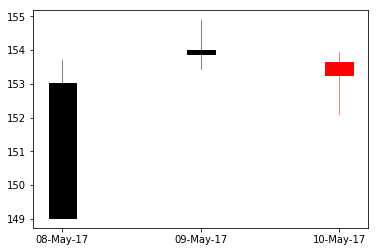

In [2]:
import io

import matplotlib.pyplot as plt
from matplotlib.finance import candlestick_ohlc
from matplotlib.dates import date2num, DayLocator, DateFormatter
import pandas as pd

s = """Date,Open,High,Low,Close,Volume1,Volume2
2017-05-08,149.029999,153.699997,149.029999,153.009995,153.009995,48752400
2017-05-09,153.869995,154.880005,153.449997,153.990005,153.990005,39130400
2017-05-10,153.630005,153.940002,152.110001,153.259995,153.259995,25805700"""
my_file = pd.read_table(io.StringIO(s), sep=',', header=0)

my_file['Date'] = date2num(pd.to_datetime(my_file['Date']).tolist())

fig, ax=plt.subplots()
candlestick_ohlc(ax, my_file.values)
ax.xaxis.set_major_locator(DayLocator())
ax.xaxis.set_major_formatter(DateFormatter('%d-%b-%y'))
plt.show()

In [3]:
import pandas_datareader.data as web
import pandas as pd
import datetime as dt
symbols = ['GM', 'TSLA','AAPL', 'GOOG', 'MSFT','ZNGA', 'VIXY', 'SPY']
start = dt.datetime(2017, 5, 4)
end = dt.datetime(2018, 8, 25)
# get OHLCV from iex (no more yahoo or google stock prices anymore)
# Idiosyncrasy of DataReader is that the top level of column labels is OHLCV, and second level is TICKER
d=web.DataReader(symbols,'iex',start) 

Populating the interactive namespace from numpy and matplotlib


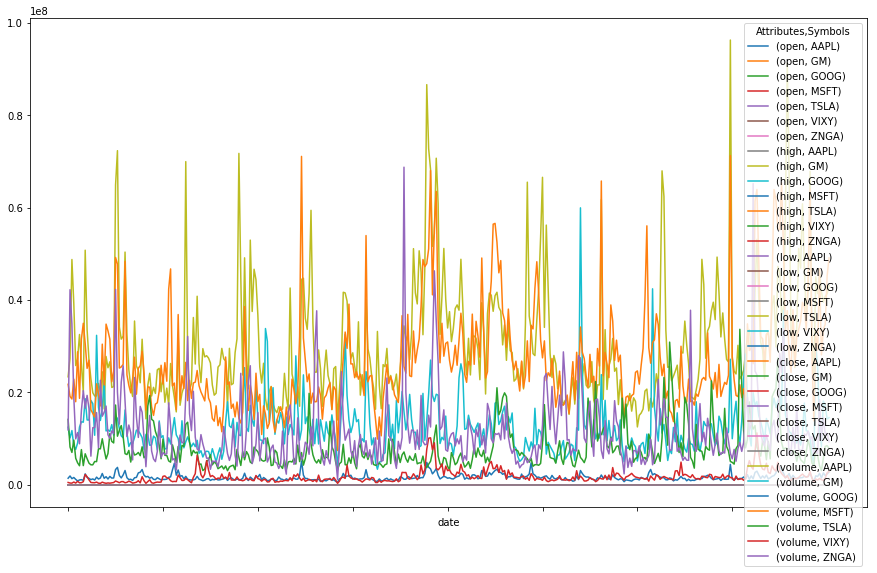

In [3]:
%matplotlib inline  
%pylab inline
import datetime as dt
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 9]
dt.date.today()
d.plot()

In [6]:
idx = pd.IndexSlice
d.columns
# swap 1st 2 levels of column labels so OHLCV the SECOND level of column labels is OHLCV, and FIRST level is TICKER
d.swaplevel(0,1,axis=1)['GM']


Attributes,open,high,low,close,volume
date,,,,,
2017-05-04,31.3629,31.3816,30.7291,30.8969,12462287
2017-05-05,31.0367,31.4748,30.9435,31.4748,10145923
2017-05-08,31.5493,31.9221,31.5027,31.6612,11736544
2017-05-09,31.5959,32.1272,31.5959,31.9315,8434533
2017-05-10,31.9221,32.1179,31.7637,31.9035,7665286
2017-05-11,31.7544,31.9035,31.5959,31.7916,9045448
2017-05-12,31.6332,31.8243,31.0087,31.3349,12503582
2017-05-15,31.6612,31.8289,31.3629,31.5214,13634449
2017-05-16,31.5959,31.6798,31.0880,31.1485,13551363


In [7]:
# Drop a column
d.drop(labels=['volume'],axis=1)

Attributes      open                                                     \
Symbols         AAPL       GM     GOOG      MSFT     TSLA   VIXY   ZNGA   
date                                                                      
2017-05-04  142.6840  31.3629   926.07   66.7757  307.435  48.44  2.900   
2017-05-05  142.9177  31.0367   933.54   66.6500  298.000  47.84  3.020   
2017-05-08  145.1283  31.5493   926.12   66.7177  310.900  47.48  3.220   
2017-05-09  149.8416  31.5959   936.95   66.6113  309.380  46.30  3.280   
2017-05-10  149.6079  31.9221   931.98   66.7370  321.560  47.16  3.340   
2017-05-11  149.0716  31.7544   925.32   66.1276  323.400  47.60  3.330   
2017-05-12  151.2717  31.6332   931.53   66.3694  325.480  47.16  3.350   
2017-05-15  152.5527  31.6612   932.95   65.9148  318.380  46.40  3.310   
2017-05-16  152.4843  31.5959   940.00   66.3801  317.590  45.36  3.400   
2017-05-17  150.1961  30.9062   935.67   67.0222  314.390  48.20  3.410   
2017-05-18  147.9178  30.0394   921.00   65.5726  307.000  53.12  3.350   
2017-05-19  149.9810  30.3377   931.47   65.6699  315.500  50.60  3.430   
2017-05-22  150.5873  30.7291   935.00   66.0494  312.800  47.36  3.450   
2017-05-23  151.4673  30.8037   947.92   66.8568  310.460  46.24  3.470   
2017-05-24  150.4308  30.9435   952.98   67.0028  306.510  46.32  3.500   
2017-05-25  150.3232  30.9435   957.33   67.1001  311.020  45.20  3.590   
2017-05-26  150.5873  30.1606   969.70   67.9076  317.280  45.96  3.480   
2017-05-30  150.0201  30.8410   970.31   67.8978  326.000  45.52  3.550   
2017-05-31  150.5579  31.4188   975.02   68.6178  337.690  44.44  3.610   
2017-06-01  149.7756  31.7450   968.95   68.3356  344.000  44.44  3.540   
2017-06-02  150.1766  32.0153   969.46   68.5302  339.770  44.12  3.600   
2017-06-05  150.9197  32.1272   976.55   70.0187  338.500  44.24  3.640   
2017-06-06  150.4895  31.9967   983.16   70.3398  344.700  44.68  3.600   
2017-06-07  151.5846  32.2218   979.65   70.6657  356.340  44.76  3.630   
2017-06-08  151.8096  31.9297   982.35   70.5441  363.750  44.72  3.590   
2017-06-09  151.7509  32.0899   984.50   70.0820  374.420  43.30  3.715   
2017-06-12  142.5103  32.2501   939.56   67.3725  357.990  44.96  3.700   
2017-06-13  143.8988  32.6836   951.91   68.1216  367.620  43.88  3.620   
2017-06-14  144.2313  32.5517   959.92   68.9875  381.085  43.24  3.550   
2017-06-15  140.1439  32.4292   933.97   67.3919  372.500  44.76  3.530   
...              ...      ...      ...       ...      ...    ...    ...   
2018-10-24  221.8260  31.4592  1104.25  107.9437  301.050  29.36  3.990   
2018-10-25  216.9530  30.8655  1071.79  106.0917  317.220  31.58  3.850   
2018-10-26  215.1493  31.3504  1037.03  105.2354  308.250  33.27  3.870   
2018-10-29  218.4279  33.7551  1082.47  107.6400  337.470  31.82  3.890   
2018-10-30  210.4158  32.8348  1008.46  103.2142  328.390  33.38  3.610   
2018-10-31  216.1259  35.5957  1059.81  104.9815  332.540  31.29  3.750   
2018-11-01  218.2884  35.8629  1075.80  106.5896  338.260  30.98  3.540   
2018-11-02  208.8214  36.4171  1073.73  106.0220  343.740  29.46  3.660   
2018-11-05  203.5896  35.6254  1055.00  105.9125  340.500  30.23  3.750   
2018-11-06  201.2179  35.8035  1039.48  106.9182  339.070  29.97  3.720   
2018-11-07  205.2538  36.3478  1069.00  108.9693  343.340  27.82  3.750   
2018-11-08  209.9800  36.0312  1091.38  111.3191  348.500  26.81  3.840   
2018-11-09  205.5500  35.7442  1073.99  110.3732  349.000  27.13  3.740   
2018-11-12  199.0000  35.2692  1061.39  108.9494  348.370  27.46  3.600   
2018-11-13  191.6300  35.5463  1043.29  107.0874  333.160  29.70  3.570   
2018-11-14  193.9000  35.8233  1050.00  108.1000  342.700  29.32  3.540   
2018-11-15  188.3900  34.5468  1044.71  104.9900  342.330  31.24  3.510   
2018-11-16  190.5000  34.9525  1059.41  107.0800  345.190  30.83  3.580   
2018-11-19  190.0000  35.3780  1057.20  108.2700  356.340  28.96  3.570   
2018-11-20  178.3700  34.

In [8]:
# Drop lower level columns ('inplace' is False so df not changed)
d.drop(labels=['GM','AAPL', 'VIXY'], axis=1, index=None, columns=None, level=1, inplace=False, errors='raise')

Attributes     open                                 high                      \
Symbols        GOOG      MSFT     TSLA   ZNGA       GOOG      MSFT      TSLA   
date                                                                           
2017-05-04   926.07   66.7757  307.435  2.900   935.9300   66.8241  307.7700   
2017-05-05   933.54   66.6500  298.000  3.020   934.9000   66.7757  308.5500   
2017-05-08   926.12   66.7177  310.900  3.220   936.9250   66.7951  313.7900   
2017-05-09   936.95   66.6113  309.380  3.280   937.5000   67.0175  321.9900   
2017-05-10   931.98   66.7370  321.560  3.340   932.0000   67.2884  325.5000   
2017-05-11   925.32   66.1276  323.400  3.330   932.5300   66.4855  326.0000   
2017-05-12   931.53   66.3694  325.480  3.350   933.4400   66.3694  327.0000   
2017-05-15   932.95   65.9148  318.380  3.310   938.2500   66.2437  320.2000   
2017-05-16   940.00   66.3801  317.590  3.400   943.1100   67.5573  320.0600   
2017-05-17   935.67   67.0222  314.390  3.410   939.3325   67.2265  314.6300   
2017-05-18   921.00   65.5726  307.000  3.350   933.1700   66.2828  313.9400   
2017-05-19   931.47   65.6699  315.500  3.430   937.7550   66.2488  316.5000   
2017-05-22   935.00   66.0494  312.800  3.450   941.8828   66.6428  314.3700   
2017-05-23   947.92   66.8568  310.460  3.470   951.4666   66.8860  310.7300   
2017-05-24   952.98   67.0028  306.510  3.500   955.0900   67.0125  311.0000   
2017-05-25   957.33   67.1001  311.020  3.590   972.6290   67.9854  316.9700   
2017-05-26   969.70   67.9076  317.280  3.480   974.9800   68.3162  325.4900   
2017-05-30   970.31   67.8978  326.000  3.550   976.2000   68.5010  336.2800   
2017-05-31   975.02   68.6178  337.690  3.610   979.2700   68.8221  342.8900   
2017-06-01   968.95   68.3356  344.000  3.540   971.5000   68.6956  344.8800   
2017-06-02   969.46   68.5302  339.770  3.600   975.8800   69.9117  342.8800   
2017-06-05   976.55   70.0187  338.500  3.640   986.9100   70.9138  348.4400   
2017-06-06   983.16   70.3398  344.700  3.600   988.2500   70.6511  359.4929   
2017-06-07   979.65   70.6657  356.340  3.630   984.1500   70.7970  360.5000   
2017-06-08   982.35   70.5441  363.750  3.590   984.5700   70.5538  371.9000   
2017-06-09   984.50   70.0820  374.420  3.715   984.5000   70.1257  376.8700   
2017-06-12   939.56   67.3725  357.990  3.700   949.3550   68.0438  364.5000   
2017-06-13   951.91   68.1216  367.620  3.620   959.9800   68.8999  376.0000   
2017-06-14   959.92   68.9875  381.085  3.550   961.1500   69.1723  384.2500   
2017-06-15   933.97   67.3919  372.500  3.530   943.3390   68.3064  375.4600   
...             ...       ...      ...    ...        ...       ...       ...   
2018-10-24  1104.25  107.9437  301.050  3.990  1106.1200  108.0234  304.4400   
2018-10-25  1071.79  106.0917  317.220  3.850  1110.9800  108.8000  321.0000   
2018-10-26  1037.03  105.2354  308.250  3.870  1106.5300  108.2823  339.9000   
2018-10-29  1082.47  107.6400  337.470  3.890  1097.0400  108.2325  347.1600   
2018-10-30  1008.46  103.2142  328.390  3.610  1037.4900  103.9311  337.8999   
2018-10-31  1059.81  104.9815  332.540  3.750  1091.9400  107.6749  342.0000   
2018-11-01  1075.80  106.5896  338.260  3.540  1083.9700  106.8584  347.8400   
2018-11-02  1073.73  106.0220  343.740  3.660  1082.9700  106.8584  349.2000   
2018-11-05  1055.00  105.9125  340.500  3.750  1058.4700  107.2766  343.9550   
2018-11-06  1039.48  106.9182  339.070  3.720  1064.3500  108.3719  348.8000   
2018-11-07  1069.00  108.9693  343.340  3.750  1095.4600  111.7573  351.1800   
2018-11-08  1091.38  111.3191  348.500  3.840  1093.2700  111.7274  357.5755   
2018-11-09  1073.99  110.3732  349.000  3.740  1075.5600  110.9707  354.0000   
2018-11-12  1061.39  108.9494  348.370  3.600  1062.1200  109.4871  349.7800   
2018-11-13  1043.29  107.0874  333.160  3.570  1056.6100  108.2723  344.7000   
2018-11-14  1050.00  108.1000  342.700  3.540  1054.5600  108.2600  347.1100   


In [9]:
# help(d.columns)
mi=d.columns
d.columns

MultiIndex(levels=[['open', 'high', 'low', 'close', 'volume'], ['AAPL', 'GM', 'GOOG', 'MSFT', 'TSLA', 'VIXY', 'ZNGA']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4], [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6]],
           names=['Attributes', 'Symbols'])

In [10]:
mi.get_loc_level('GM',1)

(array([False,  True, False, False, False, False, False, False,  True,
        False, False, False, False, False, False,  True, False, False,
        False, False, False, False,  True, False, False, False, False,
        False, False,  True, False, False, False, False, False]),
 Index(['open', 'high', 'low', 'close', 'volume'], dtype='object', name='Attributes'))

In [11]:
# d['date'] = pd.to_datetime(d['date'])
d.describe()

Attributes        open                                                   \
Symbols           AAPL          GM         GOOG        MSFT        TSLA   
count       402.000000  402.000000   402.000000  402.000000  402.000000   
mean        175.404563   36.861171  1056.198483   89.163718  324.902033   
std          23.668810    3.569764    94.529384   14.952910   28.430969   
min         139.733200   30.039400   901.760000   65.572600  252.780000   
25%         156.096850   33.842825   969.925000   73.213550  304.876125   
50%         171.098950   36.448550  1051.485000   90.348200  325.510000   
75%         188.384950   40.021050  1127.950000  102.111425  347.000000   
max         229.977600   43.915200  1271.000000  114.923600  386.690000   

Attributes                                high                           \
Symbols           VIXY        ZNGA        AAPL          GM         GOOG   
count       402.000000  402.000000  402.000000  402.000000   402.000000   
mean         32.009677    3.811107  176.911065   37.216687  1065.795900   
std           7.312989    0.261450   24.049318    3.594982    95.808446   
min          21.340000    2.900000  140.319900   30.449500   913.000000   
25%          26.047500    3.610000  157.338700   34.096225   975.947500   
50%          30.150000    3.785000  172.441050   36.894150  1062.870000   
75%          37.667500    3.980000  190.045525   40.331325  1135.820000   
max          53.120000    4.500000  232.658200   44.517300  1273.890000   

Attributes      ...            close                                volume  \
Symbols         ...             TSLA        VIXY        ZNGA          AAPL   
count           ...       402.000000  402.000000  402.000000  4.020000e+02   
mean            ...       324.884751   32.004465    3.808731  3.075733e+07   
std             ...        28.249240    7.296910    0.256221  1.309036e+07   
min             ...       250.560000   21.430000    2.840000  1.251979e+07   
25%             ...       305.275000   26.130000    3.620000  2.157981e+07   
50%             ...       326.030000   30.280000    3.775000  2.711619e+07   
75%             ...       346.920000   37.462500    3.980000  3.662386e+07   
max             ...       385.000000   53.640000    4.470000  9.624675e+07   

Attributes                                                          \
Symbols               GM          GOOG          MSFT          TSLA   
count       4.020000e+02  4.020000e+02  4.020000e+02  4.020000e+02   
mean        1.250323e+07  1.621272e+06  2.687491e+07  7.871534e+06   
std         5.843767e+06  7.026309e+05  1.132737e+07  4.441744e+06   
min         3.369417e+06  5.369960e+05  7.425603e+06  3.049546e+06   
25%         8.855177e+06  1.192828e+06  1.924926e+07  4.967702e+06   
50%         1.127565e+07  1.419384e+06  2.365182e+07  6.721456e+06   
75%         1.430979e+07  1.855092e+06  3.126562e+07  8.626428e+06   
max         5.993748e+07  5.167689e+06  7.122970e+07  3.364969e+07   

Attributes                              
Symbols             VIXY          ZNGA  
count       4.020000e+02  4.020000e+02  
mean        1.756897e+06  1.153210e+07  
std         1.429454e+06  7.790678e+06  
min         3.118020e+05  1.172806e+06  
25%         9.432538e+05  6.798094e+06  
50%         1.398168e+06  9.614699e+06  
75%         2.012810e+06  1.354527e+07  
max         1.122520e+07  6.873222e+07  

[8 rows x 35 columns]

In [14]:
# Use Boolean filting ('mask') and count - kewl:)
d[d['volume']>=1000000].count()

Attributes  Symbols
open        AAPL       402
            GM         402
            GOOG       360
            MSFT       402
            TSLA       402
            VIXY       289
            ZNGA       402
high        AAPL       402
            GM         402
            GOOG       360
            MSFT       402
            TSLA       402
            VIXY       289
            ZNGA       402
low         AAPL       402
            GM         402
            GOOG       360
            MSFT       402
            TSLA       402
            VIXY       289
            ZNGA       402
close       AAPL       402
            GM         402
            GOOG       360
            MSFT       402
            TSLA       402
            VIXY       289
            ZNGA       402
volume      AAPL       402
            GM         402
            GOOG       360
            MSFT       402
            TSLA       402
            VIXY       289
            ZNGA       402
dtype: int64

In [16]:
# Use Boolean filting ('mask') and count - kewl:)
d[d['high']>=d['low']*1.1].count()

Attributes  Symbols
open        AAPL        0
            GM          0
            GOOG        1
            MSFT        0
            TSLA        6
            VIXY       32
            ZNGA        3
high        AAPL        0
            GM          0
            GOOG        1
            MSFT        0
            TSLA        6
            VIXY       32
            ZNGA        3
low         AAPL        0
            GM          0
            GOOG        1
            MSFT        0
            TSLA        6
            VIXY       32
            ZNGA        3
close       AAPL        0
            GM          0
            GOOG        1
            MSFT        0
            TSLA        6
            VIXY       32
            ZNGA        3
volume      AAPL        0
            GM          0
            GOOG        1
            MSFT        0
            TSLA        6
            VIXY       32
            ZNGA        3
dtype: int64

In [104]:
# Calculate daily log returns
rets=log(d/d.shift(1))
rets

Attributes      open                                                    \
Symbols         AAPL        GM      GOOG      MSFT      TSLA      VIXY   
date                                                                     
2017-05-04       NaN       NaN       NaN       NaN       NaN       NaN   
2017-05-05  0.001637 -0.010458  0.008034 -0.001884 -0.031170 -0.012464   
2017-05-08  0.015349  0.016381 -0.007980  0.001015  0.042378 -0.007554   
2017-05-09  0.031961  0.001476  0.011626 -0.001596 -0.004901 -0.025167   
2017-05-10 -0.001561  0.010273 -0.005319  0.001885  0.038614  0.018404   
2017-05-11 -0.003591 -0.005272 -0.007172 -0.009173  0.005706  0.009287   
2017-05-12  0.014651 -0.003822  0.006689  0.003650  0.006411 -0.009287   
2017-05-15  0.008433  0.000885  0.001523 -0.006873 -0.022055 -0.016247   
2017-05-16 -0.000448 -0.002065  0.007528  0.007034 -0.002484 -0.022669   
2017-05-17 -0.015120 -0.022069 -0.004617  0.009627 -0.010127  0.060728   
2017-05-18 -0.015285 -0.028446 -0.015803 -0.021866 -0.023787  0.097194   
2017-05-19  0.013852  0.009880  0.011304  0.001483  0.027311 -0.048602   
2017-05-22  0.004034  0.012818  0.003783  0.005762 -0.008595 -0.066174   
2017-05-23  0.005827  0.002425  0.013724  0.012150 -0.007509 -0.023933   
2017-05-24 -0.006867  0.004526  0.005324  0.002181 -0.012805  0.001729   
2017-05-25 -0.000716  0.000000  0.004554  0.001451  0.014607 -0.024477   
2017-05-26  0.001755 -0.025626  0.012839  0.011962  0.019927  0.016674   
2017-05-30 -0.003774  0.022307  0.000629 -0.000144  0.027113 -0.009620   
2017-05-31  0.003578  0.018565  0.004842  0.010548  0.035231 -0.024012   
2017-06-01 -0.005210  0.010328 -0.006245 -0.004121  0.018513  0.000000   
2017-06-02  0.002674  0.008480  0.000526  0.002844 -0.012373 -0.007227   
2017-06-05  0.004936  0.003487  0.007287  0.021488 -0.003745  0.002716   
2017-06-06 -0.002855 -0.004071  0.006746  0.004575  0.018150  0.009897   
2017-06-07  0.007251  0.007011 -0.003577  0.004623  0.033211  0.001789   
2017-06-08  0.001483 -0.009108  0.002752 -0.001722  0.020581 -0.000894   
2017-06-09 -0.000387  0.005005  0.002186 -0.006572  0.028911 -0.032268   
2017-06-12 -0.062826  0.004980 -0.046722 -0.039429 -0.044873  0.037621   
2017-06-13  0.009696  0.013354  0.013059  0.011057  0.026545 -0.024315   
2017-06-14  0.002308 -0.004044  0.008379  0.012631  0.035973 -0.014693   
2017-06-15 -0.028749 -0.003771 -0.027406 -0.023400 -0.022785  0.034549   
...              ...       ...       ...       ...       ...       ...   
2018-10-05 -0.012295  0.008757 -0.023558 -0.017427 -0.067912  0.030979   
2018-10-08 -0.025547 -0.017295 -0.015007 -0.008650 -0.037581  0.059219   
2018-10-09  0.006415  0.005308 -0.003449 -0.004667 -0.035673  0.008299   
2018-10-10  0.008105 -0.042048 -0.013236  0.000900  0.036014  0.009869   
2018-10-11 -0.049740  0.000307 -0.052770 -0.054402 -0.027121  0.121595   
2018-10-12  0.027132  0.003979  0.032154  0.034151  0.013384 -0.003630   
2018-10-15  0.003351 -0.032596  0.000821 -0.000917 -0.007461  0.043408   
2018-10-16 -0.010134  0.024007 -0.003903  0.005768  0.025308 -0.042681   
2018-10-17  0.015276 -0.012399  0.019606  0.019348  0.060957 -0.044204   
2018-10-18 -0.020175 -0.010977 -0.004110 -0.014249 -0.047536  0.025128   
2018-10-19  0.000918 -0.031718 -0.025706 -0.010684 -0.007081  0.043840   
2018-10-22  0.007902  0.023485  0.008823  0.003574 -0.025415 -0.006758   
2018-10-23 -0.018181 -0.016349 -0.020303 -0.014280  0.012163  0.097838   
2018-10-24  0.030885  0.027102  0.021382  0.005921  0.131820 -0.051123   
2018-10-25 -0.022213 -0.019054 -0.029836 -0.017306  0.052319  0.072891   
2018-10-26 -0.008349  0.015588 -0.032969 -0.008104 -0.028684  0.052132   
2018-10-29  0.015124  0.073905  0.042885  0.022593  0.090565 -0.044561   
2018-10-30 -0.037370 -0.027643 -0.070821 -0.041986 -0.027275  0.047862   
2018-10-31  0.026776  0.080738  0.049665  0.016978  0.012558 -0.064658   
2018-11-01  0.009956  0.007478  0.014975  0.015202  0.017055 -0.009957   
2018

Index(['2017-05-04', '2017-05-05', '2017-05-08', '2017-05-09', '2017-05-10',
       '2017-05-11', '2017-05-12', '2017-05-15', '2017-05-16', '2017-05-17',
       ...
       '2018-11-02', '2018-11-05', '2018-11-06', '2018-11-07', '2018-11-08',
       '2018-11-09', '2018-11-12', '2018-11-13', '2018-11-14', '2018-11-15'],
      dtype='object', name='date', length=389)

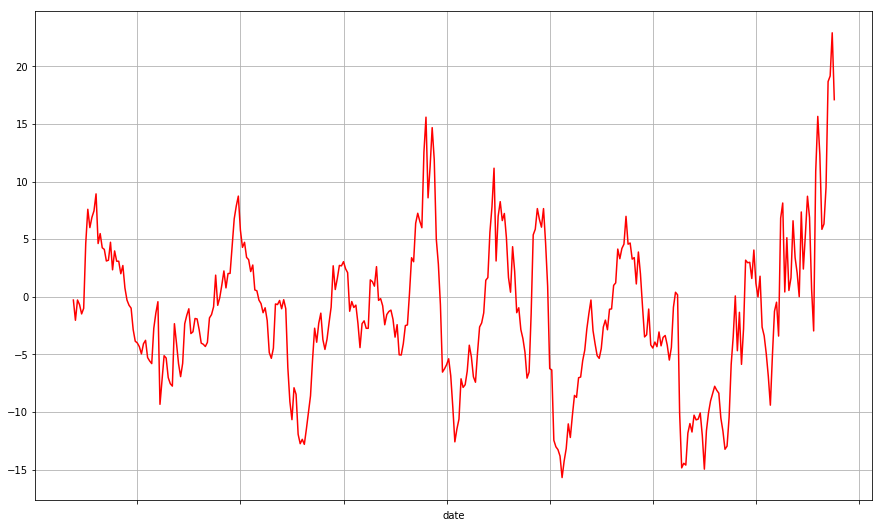

In [105]:
(d['close']['AAPL'].rolling(window=20).mean()-d['close']['AAPL']).plot(grid=True, style=['red'])
d.index

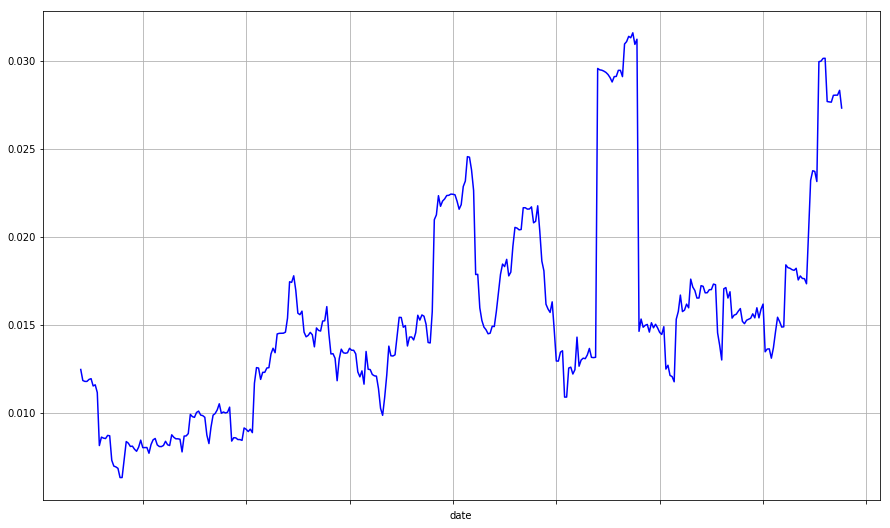

In [106]:
# Calculate rolling/moving standard deviation over a window and plot
rets['close']['GM'].rolling(window=20).std().plot(grid=True, style=['blue'])

In [20]:
# Now swap the column label levels permanently
d.columns = d.columns.swaplevel(0, 1)
d.sort_index(1, inplace=True)
d.columns

MultiIndex(levels=[['AAPL', 'GM', 'GOOG', 'MSFT', 'TSLA', 'VIXY', 'ZNGA'], ['close', 'high', 'low', 'open', 'volume']],
           labels=[[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6], [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]],
           names=['Symbols', 'Attributes'])

In [21]:
# d.drop(labels=['volume'], axis=1,inplace=True)
d

Symbols         AAPL                                               GM  \
Attributes     close      high       low      open    volume    close   
date                                                                    
2017-05-04  142.6938  143.2878  141.9926  142.6840  23371872  30.8969   
2017-05-05  145.0601  145.0796  142.9177  142.9177  27327725  31.4748   
2017-05-08  149.0041  149.6760  145.1283  145.1283  48752413  31.6612   
2017-05-09  149.9584  150.8251  149.4326  149.8416  39130363  31.9315   
2017-05-10  149.2476  149.9098  148.1277  149.6079  25805692  31.9035   
2017-05-11  150.5384  150.6557  148.9347  149.0716  27255058  31.7916   
2017-05-12  152.6407  152.9536  151.2424  151.2717  32527017  31.3349   
2017-05-15  152.2496  153.1785  151.6140  152.5527  26009719  31.5214   
2017-05-16  152.0247  152.6016  151.2913  152.4843  20048478  31.1485   
2017-05-17  146.9204  151.1446  146.3923  150.1961  50767678  30.2165   
2017-05-18  149.1596  149.9419  147.7809  147.9178  33568215  30.2631   
2017-05-19  149.6681  150.5677  149.2476  149.9810  26960788  30.4961   
2017-05-22  150.5775  151.1544  149.5214  150.5873  22966437  30.6825   
2017-05-23  150.3917  151.4673  149.9125  151.4673  19918871  30.9621   
2017-05-24  149.9419  150.7535  149.2867  150.4308  19219154  30.9435   
2017-05-25  150.4601  150.9295  149.6387  150.3232  19235598  30.3843   
2017-05-26  150.2059  150.8219  149.9125  150.5873  21927637  30.8223   
2017-05-30  150.2646  151.0077  149.9321  150.0201  20126851  31.2511   
2017-05-31  149.3747  150.7535  149.0032  150.5579  24451164  31.6239   
2017-06-01  149.7854  149.9321  148.8467  149.7756  16404088  32.0899   
2017-06-02  152.0051  152.0051  149.5018  150.1766  27770715  32.1085   
2017-06-05  150.5188  151.0273  150.0592  150.9197  25331662  32.1179   
2017-06-06  151.0273  152.3571  150.3721  150.4895  26624926  32.0899   
2017-06-07  151.9269  152.5234  151.0566  151.5846  21069647  32.3632   
2017-06-08  151.5553  152.0931  150.9784  151.8096  21250798  32.1464   
2017-06-09  145.6785  151.7509  142.7841  151.7509  64882657  32.3632   
2017-06-12  142.1974  142.8525  139.3519  142.5103  72307330  32.6836   
2017-06-13  143.3415  144.1824  141.9334  143.8988  34165445  32.5234   
2017-06-14  141.9432  144.2313  140.6524  144.2313  31531232  32.6177   
2017-06-15  141.0924  141.2780  139.0585  140.1439  32165373  32.6082   
...              ...       ...       ...       ...       ...      ...   
2018-10-24  214.3421  223.4504  213.7940  221.8260  40925163  30.2420   
2018-10-25  219.0358  220.6103  215.9964  216.9530  29855768  31.6670   
2018-10-26  215.5479  219.4244  211.9305  215.1493  47258375  32.3103   
2018-10-29  211.5020  218.9261  205.3734  218.4279  45935520  32.7853   
2018-10-30  212.5584  214.4318  208.5424  210.4158  36659990  33.1910   
2018-10-31  218.0990  219.6835  215.8668  216.1259  38358933  36.2093   
2018-11-01  221.4473  221.5869  216.0562  218.2884  58323180  36.0905   
2018-11-02  206.7586  212.9071  204.7157  208.8214  91328654  35.6551   
2018-11-05  200.8891  203.6793  197.4810  203.5896  66163669  35.8728   
2018-11-06  203.0615  204.0082  200.9887  201.2179  31882881  36.0806   
2018-11-07  209.2200  209.3296  203.4202  205.2538  33424434  36.4963   
2018-11-08  208.4900  210.1200  206.7500  209.9800  25362636  36.1895   
2018-11-09  204.4700  206.0100  202.2500  205.5500  34365750  35.3285   
2018-11-12  194.1700  199.8500  193.7900  199.0000  51135518  35.3186   
2018-11-13  192.2300  197.1800  191.4501  191.6300  46882936  35.5561   
2018-11-14  186.8000  194.4800  185.9300  193.9000  60800957  34.8634   
2018-11-15  191.4100  191.9700  186.9000  188.3900  46478801  35.1801   
2018-11-16  193.5300  194.9695  189.4600  190.5000  36928253  35.3780   
2018-11-19  185.8600  190.7000  184.9900  190.0000  41920872  35.3088   
2018-11-20  176.9800  181.4700  175.5100  178.3700  67825247  34.7249   
2018-11-21  176.7800  180.2700  176.5500  179.7300  311242

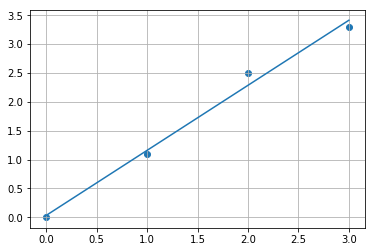

In [6]:
import matplotlib.pyplot as plt, pylab as lab
A=np.array([[0,.003],[1,1.1],[2,2.5],[3,3.29]])
m,b=lab.polyfit(A[:,0],A[:,1],1)
m,b
plt.grid(axis='both')
plt.scatter(A[:,0],A[:,1])
plt.plot(A[:,0], m*A[:,0]+b)

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates, ticker
import matplotlib as mpl
import mpl_finance as fin
from mpl_finance import candlestick_ohlc 

ModuleNotFoundError: No module named 'mpl_finance'

In [23]:
# OMG this was painful ... but instructive. I wanted to get 
# d=d.drop(labels=['volume'],axis=1, level=1)
# d = d.drop('index', 1)
k=d.index.tolist()
# l=d['GM'].apply(tuple, axis=1).tolist()
# Below reset_index causes index (timestamps as strings) to become ordinary column
f=d['GM'].reset_index()
# This applies(in map-style) function to convert time string in (new)'date' column
f['date'] = f['date'].apply(lambda x : dt.datetime.strptime(x, "%Y-%m-%d").toordinal())
# f.apply(tuple, axis=1).tolist()
# filt=d.iloc[:, 0:4]
# f=filt.reset_index(inplace=True)
type(f.iloc[1,0])
f

Attributes,date,close,high,low,open,volume
0,736453,30.8969,31.3816,30.7291,31.3629,12462287
1,736454,31.4748,31.4748,30.9435,31.0367,10145923
2,736457,31.6612,31.9221,31.5027,31.5493,11736544
3,736458,31.9315,32.1272,31.5959,31.5959,8434533
4,736459,31.9035,32.1179,31.7637,31.9221,7665286
5,736460,31.7916,31.9035,31.5959,31.7544,9045448
6,736461,31.3349,31.8243,31.0087,31.6332,12503582
7,736464,31.5214,31.8289,31.3629,31.6612,13634449
8,736465,31.1485,31.6798,31.0880,31.5959,13551363
9,736466,30.2165,31.2324,29.9089,30.9062,18631945


In [24]:
f.date

0      736453
1      736454
2      736457
3      736458
4      736459
5      736460
6      736461
7      736464
8      736465
9      736466
10     736467
11     736468
12     736471
13     736472
14     736473
15     736474
16     736475
17     736479
18     736480
19     736481
20     736482
21     736485
22     736486
23     736487
24     736488
25     736489
26     736492
27     736493
28     736494
29     736495
        ...  
372    736991
373    736992
374    736993
375    736996
376    736997
377    736998
378    736999
379    737000
380    737003
381    737004
382    737005
383    737006
384    737007
385    737010
386    737011
387    737012
388    737013
389    737014
390    737017
391    737018
392    737019
393    737021
394    737024
395    737025
396    737026
397    737027
398    737028
399    737031
400    737032
401    737034
Name: date, Length: 402, dtype: int64

In [25]:
f.index
f['Timestamp']=f['date']
f = f.set_index(['Timestamp'])
f.index = pd.to_datetime(f.index)
f.resample('M')
f

Attributes,date,close,high,low,open,volume
Timestamp,,,,,,
1970-01-01 00:00:00.000736453,736453,30.8969,31.3816,30.7291,31.3629,12462287
1970-01-01 00:00:00.000736454,736454,31.4748,31.4748,30.9435,31.0367,10145923
1970-01-01 00:00:00.000736457,736457,31.6612,31.9221,31.5027,31.5493,11736544
1970-01-01 00:00:00.000736458,736458,31.9315,32.1272,31.5959,31.5959,8434533
1970-01-01 00:00:00.000736459,736459,31.9035,32.1179,31.7637,31.9221,7665286
1970-01-01 00:00:00.000736460,736460,31.7916,31.9035,31.5959,31.7544,9045448
1970-01-01 00:00:00.000736461,736461,31.3349,31.8243,31.0087,31.6332,12503582
1970-01-01 00:00:00.000736464,736464,31.5214,31.8289,31.3629,31.6612,13634449
1970-01-01 00:00:00.000736465,736465,31.1485,31.6798,31.0880,31.5959,13551363


In [26]:
import datetime as dt
t=dt.datetime.strptime("30Nov00", "%d%b%y")
now=dt.datetime.now()
now.toordinal()


737035

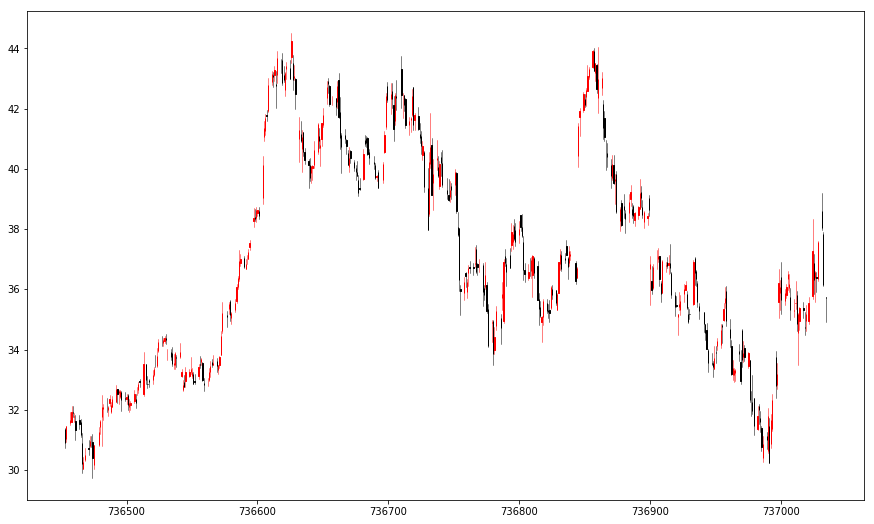

Attributes,date,close,high,low,open,volume
Timestamp,,,,,,
1970-01-01 00:00:00.000736453,736453,30.8969,31.3816,30.7291,31.3629,12462287
1970-01-01 00:00:00.000736454,736454,31.4748,31.4748,30.9435,31.0367,10145923
1970-01-01 00:00:00.000736457,736457,31.6612,31.9221,31.5027,31.5493,11736544
1970-01-01 00:00:00.000736458,736458,31.9315,32.1272,31.5959,31.5959,8434533
1970-01-01 00:00:00.000736459,736459,31.9035,32.1179,31.7637,31.9221,7665286
1970-01-01 00:00:00.000736460,736460,31.7916,31.9035,31.5959,31.7544,9045448
1970-01-01 00:00:00.000736461,736461,31.3349,31.8243,31.0087,31.6332,12503582
1970-01-01 00:00:00.000736464,736464,31.5214,31.8289,31.3629,31.6612,13634449
1970-01-01 00:00:00.000736465,736465,31.1485,31.6798,31.0880,31.5959,13551363


In [27]:
# candlestick2_ohlc takes individual parameters for O, H, L C lists
from matplotlib.finance import candlestick_ohlc
fig, ax1 = plt.subplots()
# fin.candlestick2_ohlc(ax1, d['open']['GM'], d['high']['GM'], d['low']['GM'], d['close']['GM'], width=4, colorup='g', colordown='r', alpha=0.75)
# fin.candlestick2_ohlc(ax1, d['open'], d['high'], d['low'], d['close'], width=4, colorup='g', colordown='r', alpha=0.75)
d
# nd=d['GM'].values
# print(nd.shape)
candlestick_ohlc(ax1, f.values)
plt.show()
f
#
# 
# fin.candlestick2_ohlc(ax1,d['GM'].values)

In [115]:
d.index

Index(['2017-05-04', '2017-05-05', '2017-05-08', '2017-05-09', '2017-05-10',
       '2017-05-11', '2017-05-12', '2017-05-15', '2017-05-16', '2017-05-17',
       ...
       '2018-11-02', '2018-11-05', '2018-11-06', '2018-11-07', '2018-11-08',
       '2018-11-09', '2018-11-12', '2018-11-13', '2018-11-14', '2018-11-15'],
      dtype='object', name='date', length=389)

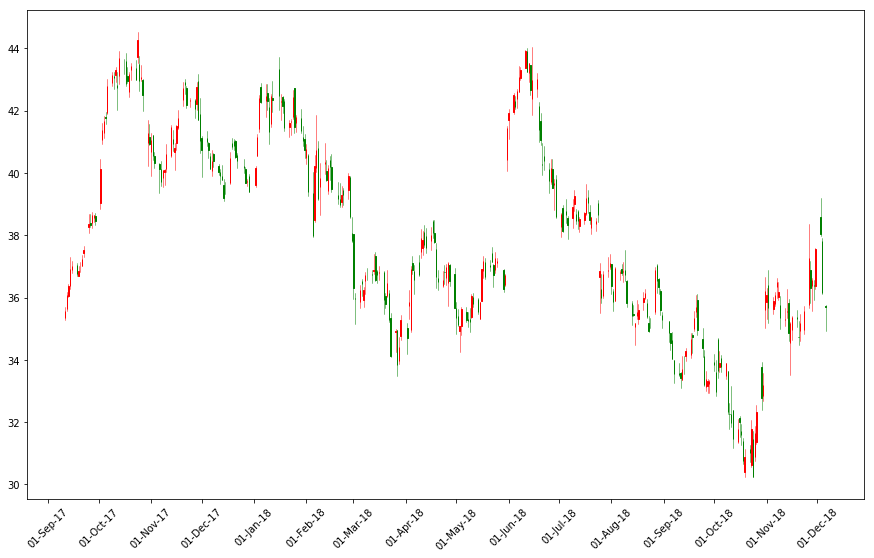

In [28]:
# candlestick2_ohlc takes individual parameters for O, H, L C lists
import io
import datetime as dt
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from matplotlib.finance import candlestick_ohlc
from matplotlib.dates import date2num, DayLocator, MonthLocator, DateFormatter
import pandas as pd

symbols = ['GM', 'IBM', 'TSLA','AAPL', 'GOOG', 'MSFT','ZNGA', 'VIXY']
start = dt.datetime(2017, 9, 10)
end = dt.datetime(2018, 8, 25)
d=web.DataReader(symbols,'iex',start) 

# Now swap the column label levels permanently
d.columns = d.columns.swaplevel(0, 1)
d.sort_index(1, inplace=True)

dd=d['GM'].reset_index()
dd['date'] = date2num(pd.to_datetime(dd['date']).tolist())

plt.rcParams['figure.figsize'] = [15, 9]
fig, ax=plt.subplots()
candlestick_ohlc(ax, dd.values,colorup='green', colordown='red')
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%d-%b-%y'))
plt.xticks(rotation=45)
plt.show()

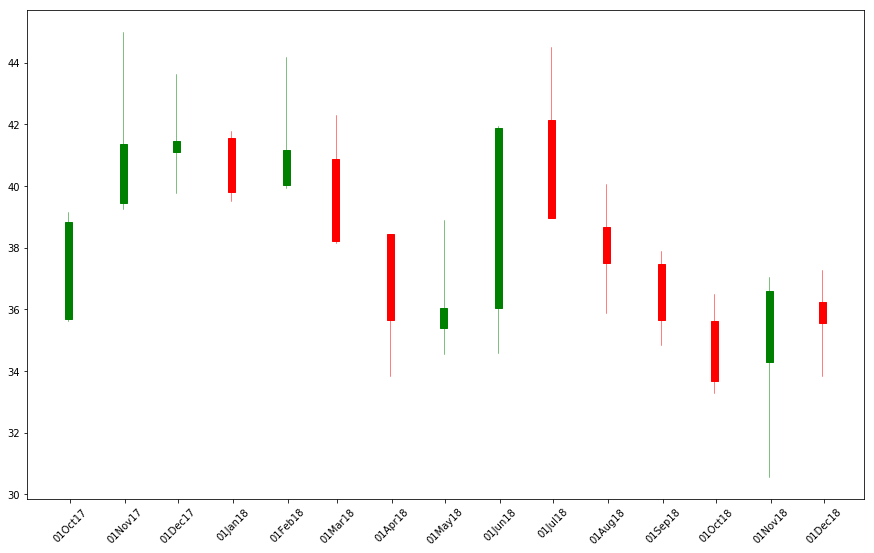

In [118]:
# Now try to re-sample (down-sample) from daily to monthly, and to synthesise OHLC
d.index = pd.to_datetime(d.index)
dw=d['GM']
# Create new df for resample - 'M' Monthly but also intra-day, quarterly, weekly etc.
dx=pd.DataFrame()
dx['Open']=dw['open'].resample('M').first()
dx['High']=dw['high'].resample('M').max()
dx['Low'] =dw['low'].resample('M').min()
dx['Close']=dw['close'].resample('M').last()

# print(dx)
dx=dx.reset_index()
dx['date'] = date2num(pd.to_datetime(dx['date']).tolist())

plt.rcParams['figure.figsize'] = [15, 9]
fig, ax=plt.subplots()
candlestick_ohlc(ax, dx.values,width=4,colorup='green', colordown='red')
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%d%b%y'))
plt.xticks(rotation=45)
plt.show()

In [66]:
x.first()

date
2018-09-30    33.830
2018-10-31    33.990
2018-11-30    35.695
Freq: M, Name: low, dtype: float64

In [67]:
d['GM']['close'].max()

36.88

In [ ]:
d[where d['']]